# CAPSTONE 1
    
    Heart Disease Analysis
    
  
        Heart disease is the leading cause of death for both men and women in the United States. About 610,000 people die every year- that's equivalent to 1 in every 4 deaths according to the Center for Disease Control (CITE). With heart disease being so prevalent, it's vital to understand who is most at risk for this disease. A way that helps providers diagnose heart disease is through stress test (EXPLAIN WHAT IS A THALLIUM STRESS TEST).
   
        In this capstone, we explore a data set that was obtained from tin the University of California, Irvine,  machine learning repository (via Kaggle). It consists of 14 variables measured on 303 individuals that underwent a thallium stress test. 
    
        As a medical professional, it would be wonderful to get some insight from the this data set, as I've encountered countless patients with heart disease. Our goal for this report is to explore that data and determine correlations between heart disease and various variables from the data set. 
      


# What are some of the questions we may be able to answer through this data set? 

1. What does age and gender reveal about heart disease during stress test? 
2. Is chest pain a good indicator of heart disease?
3. Is there a correlation between exercise induced CP and heart disease ? 
4. Is there a correlation between max heart rate achieved levels and heart disease?
5. Does cholesterol level and restbp have any correlation with heart disease?



First, let's look at the data. 


In [44]:
#let's start the imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
heart=pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart.rename(index=str, columns={"thalach": "maxHR", "ca":"artery"}, inplace=True)
heart.head()
#Just to make some variables understandable

,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,artery,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Values in the data set include:
sex:(0 = female, 1 = male )
cpchest pain type
cp: chest pain type:
Value 0: typical angina  
Value 1: atypical angina 
Value 2: non-anginal pain  
Value 3: asymptomatic  
trestbpsresting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs(fasting blood sugar > 120 mg/dl) (0 = false, 1 = true )
restecg: resting electrocardiographic results
 resting electrocardiographic results -- 
 Value 0: normal 
 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
thalachmaximum heart rate achieved
exangexercise induced angina (1 = yes; 0 = no)
oldpeakST depression induced by exercise relative to rest
slopethe slope of the peak exercise ST segment
canumber of major vessels (0-3) colored by flourosopy
thal3 = normal; 6 = fixed defect; 7 = reversable defect
target 0 for no disease and 1 for disease

In [10]:
#Let's take a look at the data.
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
maxHR       303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
artery      303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,artery,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


First, let's see how many of our population have disease vs. no disease


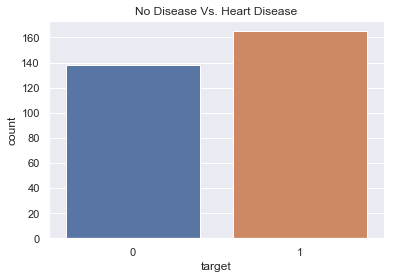

In [12]:
sns.set(font_scale=1)
sns.countplot(heart.target)
plt.title("No Disease Vs. Heart Disease")
plt.show()



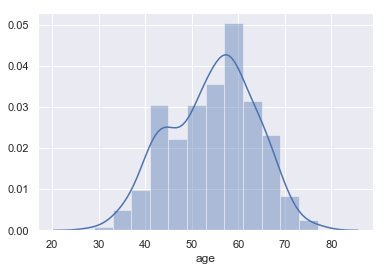

54.366336633663366

In [90]:
sns.distplot(heart.age)
plt.show()
heart.age.mean()
#the average age of our participants is 54
#pretty normal distribution of age.

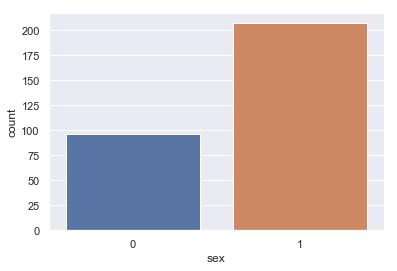

In [569]:
sns.set()
sns.countplot(heart.sex)
#labels=(heart[heart.sex==0["Female"], [heart.sex==1["Male"]
#plt.legend(labels='Female')
plt.show()
#there are more men than women.

In [97]:
womenhd=heart[(heart.target ==  1) & (heart.sex == 0)].age.mean()
womenstd=heart[(heart.target ==  1) & (heart.sex == 0)].age.std()
print ('Women with heart disease age mean and std')
print(round(womenhd)) #the average age of women with heart disease
print(round(womenstd))
print('Men with heart disease age mean and std')
menhd= heart[(heart.target == 1) & (heart.sex == 1)].age.mean() 
menstd= heart[(heart.target == 1) & (heart.sex == 1)].age.std() 
print (round(menhd)) #average age of men with heart disease. 
print (round(menstd))

Women with heart disease age mean and std
55.0
10.0
Men with heart disease age mean and std
51.0
9.0


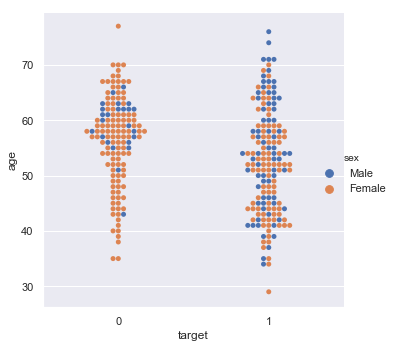

Percentage of men with disease:  0.4492753623188406
Percentage of women:  0.75


In [571]:
#Now let's see who has more heart disease, men or women? 
g=sns.catplot(x="target", y="age", hue="sex", kind="swarm", legend_out=True, data=heart)
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

print("Percentage of men with disease: ",heart[(heart.sex==1)&(heart.target==1)].shape[0]/heart[(heart.sex==1)].shape[0])
print("Percentage of women: ",heart[(heart.sex==0)&(heart.target==1)].shape[0]/heart[(heart.sex==0)].shape[0])




Our first question, "What does age and gender reveal about heart disease?":This reveals that more men are diagnosed than women. But we must also remember that there are more men in this sample. Therefore, we look at percentages. 75% of the women in this sample were diagnosed with heart disease vs. 45% of men. 

This is interesting because both men and women are at risk for developing the disease although the way heart disease, or even heart attack may present can be different between men and women. (CITE). We also know, based from past literatures, that women develop heart disease 7-10 years later than men. Menopause also presents risk. Menopause transition is associated with a worsening Coronary Heart Disease risk profile (Maas, 2010).  In this sample, we know that the average age women is 54 vs. 50 for men. 

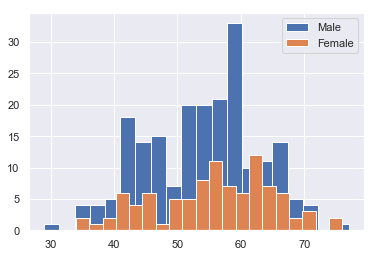

In [26]:
heart[heart.sex==1].age.hist(bins=20);
heart[heart.sex==0].age.hist(bins=20);
labels=('Male', 'Female')
plt.legend(labels)
plt.show()
#This shows the distribution of men vs women. 
#Women slightly older than men?

In [72]:
heart.loc[(heart.age>=60) & (heart.sex==0)].count()


age         38
sex         38
cp          38
trestbps    38
chol        38
fbs         38
restecg     38
thalach     38
exang       38
oldpeak     38
slope       38
ca          38
thal        38
target      38
dtype: int64

In [73]:
heart.loc[(heart.age>=60) & (heart.sex==1)].count()

age         52
sex         52
cp          52
trestbps    52
chol        52
fbs         52
restecg     52
thalach     52
exang       52
oldpeak     52
slope       52
ca          52
thal        52
target      52
dtype: int64

What about the other variables? What can we learn?

# Question 2. Is chest pain a good indicator of heart disease?
Let's look at what type of chest pains patients presented with.

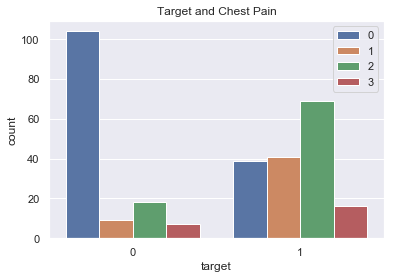

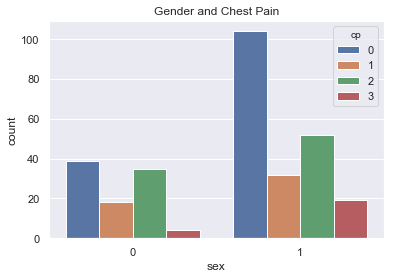

In [578]:
sns.countplot(heart.target,hue=heart.cp)
plt.title('Target and Chest Pain')
plt.legend(loc='best')
plt.show()


sns.countplot(heart.sex, hue=heart.cp)
plt.title('Gender and Chest Pain')
plt.show()

#It looks like more males suffered from type 1 chest pain than women. 
#I wonder which type affects more of each gender and its correlation with heart disease?

Value 0: typical angina 
Value 1: atypical angina 
Value 2: non-anginal pain 
Value 3: asymptomatic

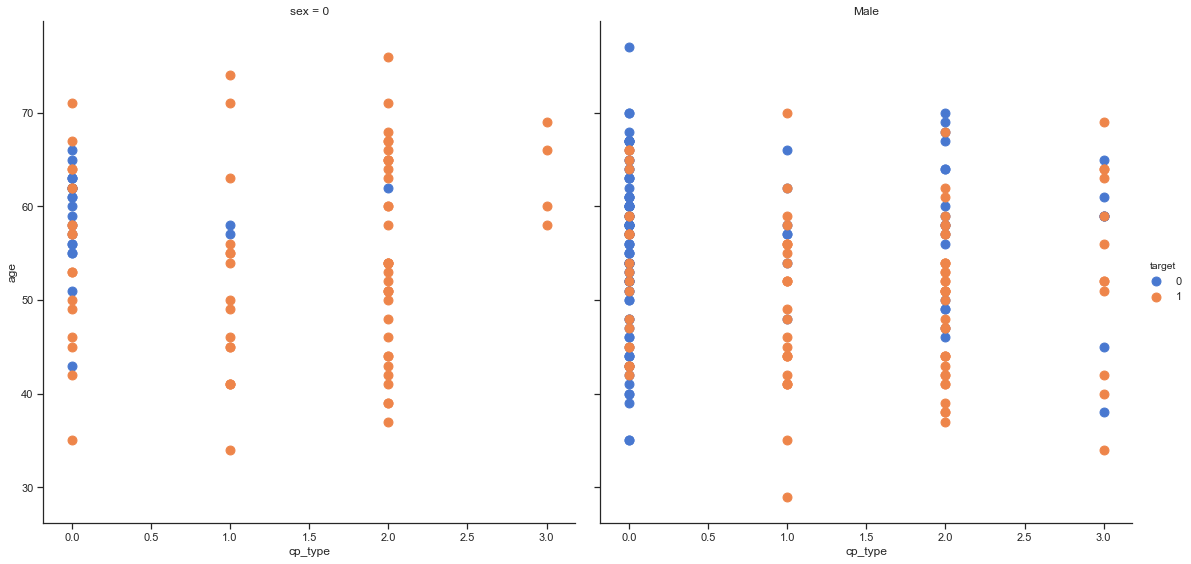

In [466]:
g= heart[(heart.target == 1) & (heart.sex == 1) & (heart.cp_type==2)]
sns.set(style="ticks")
sns.lmplot(x="cp_type", y="age", col="sex", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1})
plt.title('Male')
plt.show()

In [467]:
a=heart[(heart.sex==0)&(heart.target==1)&(heart.cp_type==2)].shape[0]/heart[(heart.sex==0)&(heart.target==1)].shape[0]
b=heart[(heart.sex==1)&(heart.target==1)&(heart.cp_type==2)].shape[0]/heart[(heart.sex==1)&(heart.target==1)].shape[0]
print (a)
print (b)

0.4722222222222222
0.3763440860215054


 Chest pain type 2, which is non-anginal chest pain is the most common type of chest pain in women and men. Around 47% of women had this chest pain and is positive for heart disease, while 38% of men had this type. Around 27% of men suffered from typical chest pain. Based on this observation, we can support the fact that women can present heart disease differently than men, almost half our female participants that were diagnosed with heart disease suffered from non-anginal chest pain. Not to be confused with aytpical chest pain, non-anginal chest pain means originating from another part of body other than chest. It could be jaw pain or shoulder pain. 
This supports the current studies about women presenting differently than men (CITE)

# What about chest pain during exercise(stress test)? 

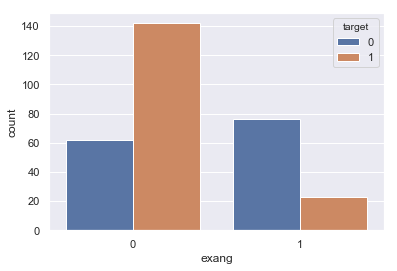

In [468]:
sns.set(style="darkgrid")
#Is there a correlation between exercise induced chest pain and heart disease ? 
ax = sns.countplot(x="exang", hue="target", data=heart)
#exang exercise induced angina (0 = no, 1 = yes)
#here we learned that during stress test, only a small fraction of 
#patients had exercise induced angina and was positive for heart disease. 


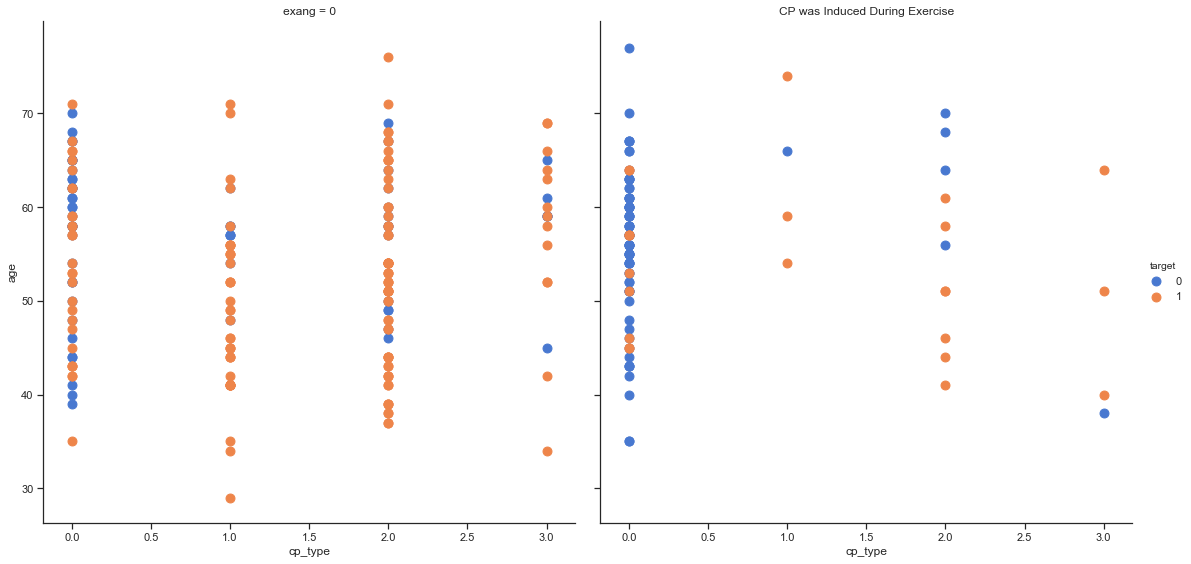

In [469]:
sns.set(style="ticks")
sns.lmplot(x="cp_type", y="age", col="exang", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1})
plt.title('CP was Induced During Exercise')
plt.show()

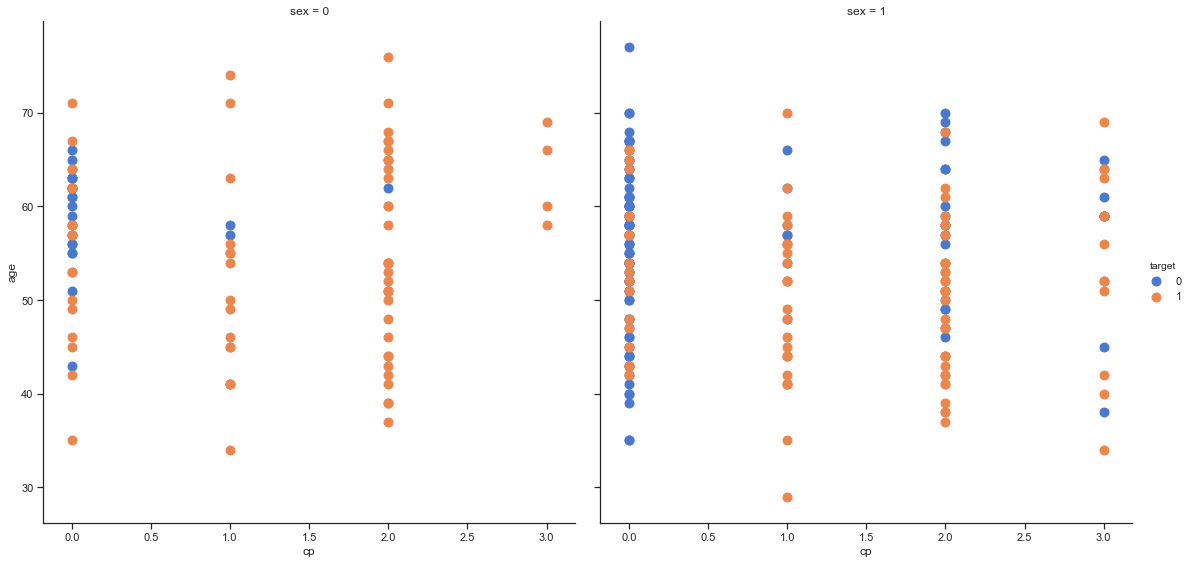

In [79]:
sns.set(style="ticks")
sns.lmplot(x="cp", y="age", col="sex", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1})
labels=('Male', 'Female')
#fix the title!!!! 
plt.show()
#figure out the label situation 

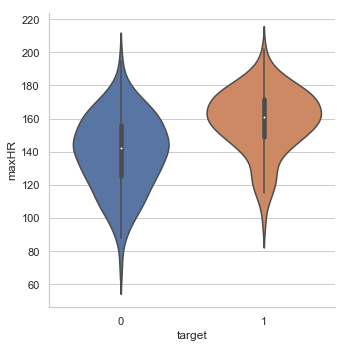

In [472]:
    
    
# Violin plot
#4. Is there a correlation between maxHR levels and heart disease?
sns.set_style('whitegrid')
sns.catplot(x="target", y="maxHR",
            kind="violin",scale='count', data=heart);
#participants who have higher max heart rate achieved are diagnosed more with heart disease. 
#A patient's target heart rate during a stress is 85% of the maximum heart rate predicted for his/her age.
#To calculate max heart rate, subtract 220-age then multiply that by .85 to get target heart rate.(CITE) 


# Is there a correlation between exercise induced CP and heart disease ? 

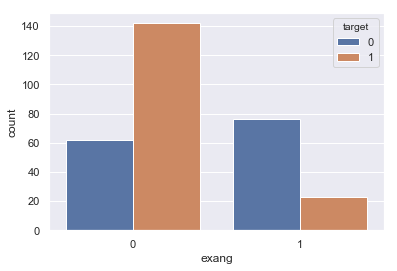

In [80]:
sns.set(style="darkgrid")
ax = sns.countplot(x="exang", hue="target", data=heart)
#FIX the legend!!!!

#exang exercise induced angina (1 = yes; 0 = no)
#here we learned that during stress test, only a small fraction of 
#patients had exercise induced angina and was positive for heart disease. 


#need more stats! 

# 5. Does cholesterol level and resting blood pressure have any correlation with heart disease?

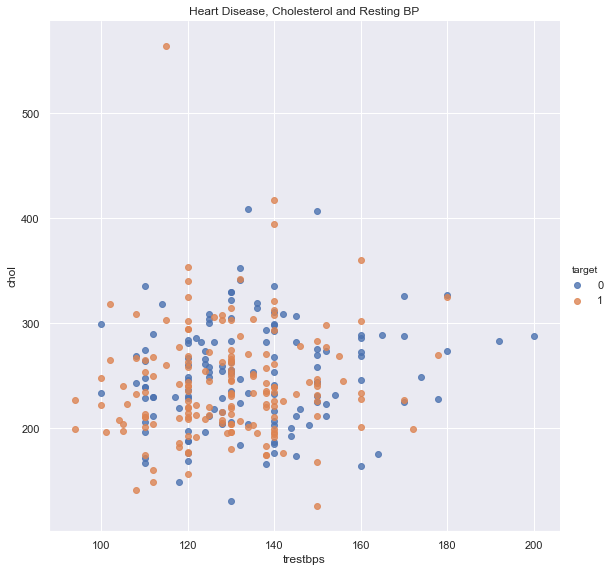

In [88]:
sns.lmplot(x='trestbps', y='chol', data=heart, hue='target', fit_reg=False, height=8)
plt.title('Heart Disease, Cholesterol and Resting BP')
plt.show()
#think about doing histograms?? look at distribution?? or do a boxplot or violin plot??
#doesn't show any correlation here. 

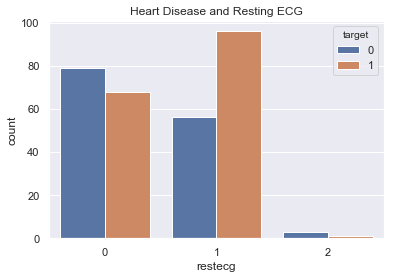

In [87]:
#Let's take a look at how many people had restecgs abnormality and if they had heart disease

import seaborn as sns
sns.set(style="darkgrid")
plt.title('Heart Disease and Resting ECG')
ax = sns.countplot(x="restecg", hue="target", data=heart)
#Value 0: normal -- 
#Value 1: having ST-T wave abnormality 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#This strongly shows that having ST-T wave abnormality on a resting EKG is highly indicative of heart disease.


#Figure out what stats to use for this!!!!

Text(0.5, 1.0, 'Heart Disease and Cholesterol')

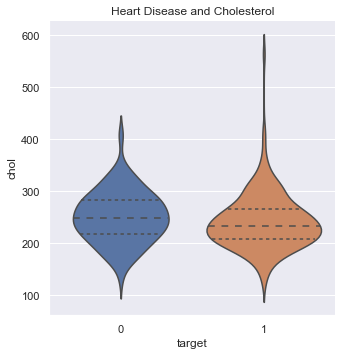

In [86]:
sns.catplot(x="target", y="chol",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.title('Heart Disease and Cholesterol')

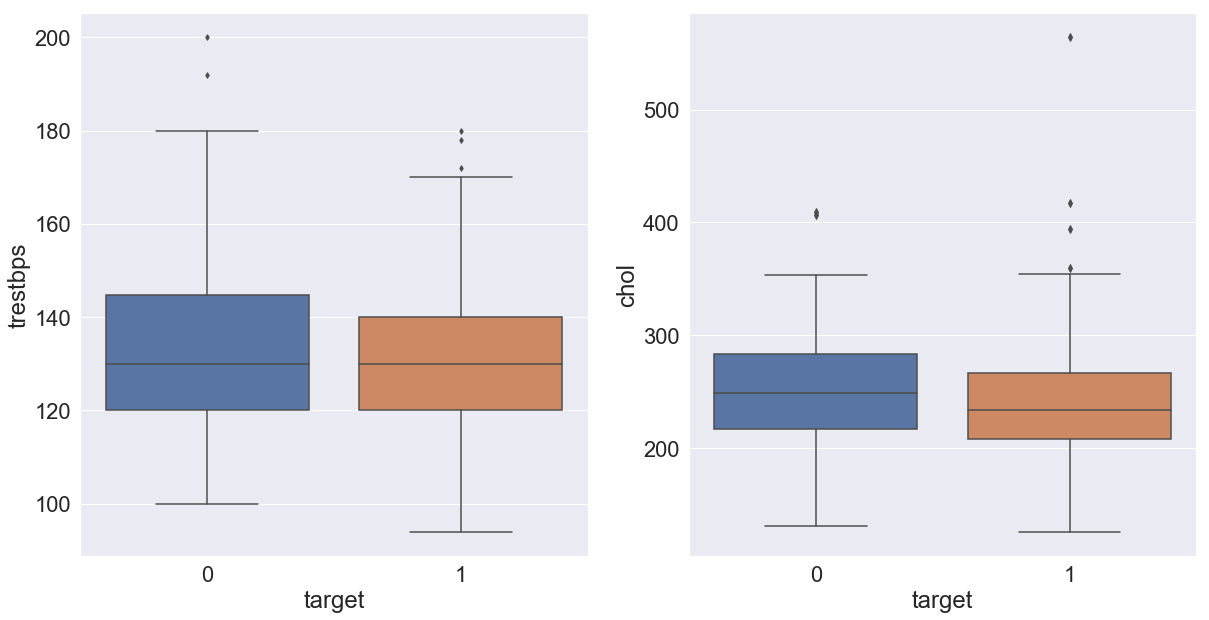

In [537]:
f, axes = plt.subplots(1, 2,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=heart.target, y=heart.trestbps, ax=axes[0],fliersize=4);
sns.boxplot(x=heart.target, y=heart.chol, ax=axes[1]);
#Hmm.. The cholesterol levels do not differ much in heart disease group vs. no heart disease. One would think that
#it should be higher in people with heart disease. 
#The resting blood pressure has very close median. 
#Surprisingly, the systolic bp is even higher for some in the group with no heart disease. 


#Need to figure out how to show n size of each box. 

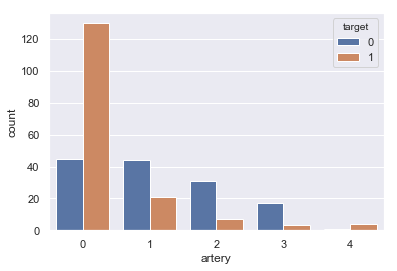

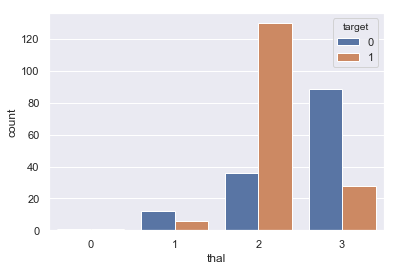

In [581]:
#show this to Max. The values do not match with the data set. For now, not including artery and thal for report. 
ax = sns.countplot(x="artery", hue="target", data=heart)
plt.show()
ax = sns.countplot(x="thal", hue="target", data=heart)
#plt.show()

In [583]:
heart[heart.thal==0].count() #Values are wrong. Does not match data set. 

age         2
sex         2
cp          2
trestbps    2
chol        2
fbs         2
restecg     2
maxHR       2
exang       2
oldpeak     2
slope       2
artery      2
thal        2
target      2
dtype: int64